# Credit Card Fraud Detection

In [ ]:
#Installing packages
!pip install mglearn
!pip install pydotplus
!pip install xgboost
!pip install graphviz

In [5]:
# Importing Packages
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import glob
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
import mglearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from mglearn.plot_helpers import cm2, cm3, discrete_scatter
from sklearn.decomposition import PCA
from sklearn.tree._tree import TREE_LEAF
from IPython.display import display, Image
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn.tree import _tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit,learning_curve
import matplotlib.patches as mpatches
import time
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [6]:
warnings.filterwarnings("ignore")

In [7]:
os.environ["PATH"] += os.pathsep + 'C:/Users/laksh/Anaconda3/Library/bin/' 

In [8]:
# Changing Directory
os.chdir("A:\Semester 2\Machine Learning\Dataset")

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [10]:

def plot_learning_t_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Test score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [11]:
def graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr, l_svc_fpr, l_svc_tpr,r_svc_fpr, r_svc_tpr,
                           p_svc_fpr, p_svc_tpr, tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(l_svc_fpr, l_svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, 
                                                                                                      linear_pred)))
    plt.plot(r_svc_fpr, r_svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, 
                                                                                                      RBF_pred)))
    plt.plot(p_svc_fpr, p_svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, 
                                                                                                      Poly_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
         roc_auc_score(y_train,tree_pred)))
    plt.plot(Knn_fpr, Knn_tpr, label='KNN Classifier Score: {:.4f}'.format(
         roc_auc_score(y_train,Knn_pred)))
    plt.plot(NN_fpr, NN_tpr, label='Neural Network Classifier Score: {:.4f}'.format(
         roc_auc_score(y_train,NN_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

In [12]:
def graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, l_svc_fpr, l_svc_tpr,r_svc_fpr, r_svc_tpr,
                           p_svc_fpr, p_svc_tpr, tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(l_svc_fpr, l_svc_tpr, label='Linear Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                      linear_pred_test)))
    plt.plot(r_svc_fpr, r_svc_tpr, label='RBF Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                      RBF_pred_test)))
    plt.plot(p_svc_fpr, p_svc_tpr, label='Poly Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                     Poly_pred_test)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                    Decision_Tree_pred_test)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,XGboost_Decision_Tree_pred_test)))
    plt.plot(Knn_fpr, Knn_tpr, label='KNN Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,Knn_pred_test)))
    plt.plot(NN_fpr, NN_tpr, label='Neural Network Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,NN_pred_test)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )
    plt.legend()

In [13]:
# Reading Credit Card fraud Detection CSV file
CCFD_data =pd.read_csv('creditcard.csv')

In [14]:
CCFD_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Preprocessing Data

In [15]:
# Checking whether dataset is balanced or not
print ('count of 1: {:.0f}' .format(len(CCFD_data[CCFD_data['Class'] == 1])))
print ('count of 0: {:.0f}' .format(len(CCFD_data[CCFD_data['Class'] == 0])))

count of 1: 492
count of 0: 284315


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

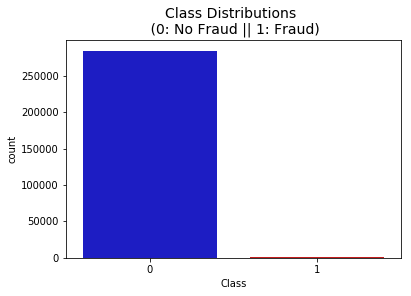

In [16]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=CCFD_data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

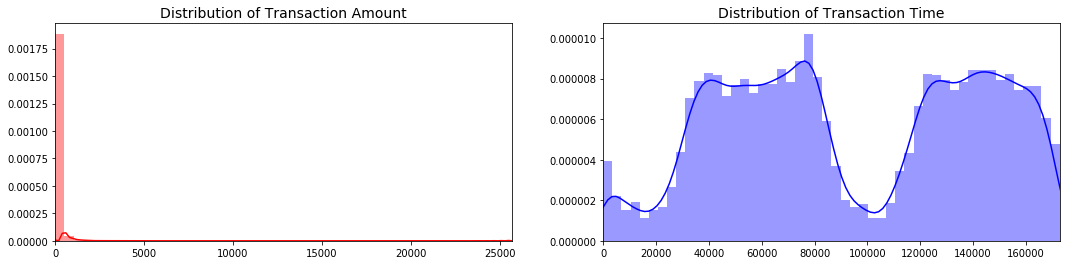

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = CCFD_data['Amount'].values
time_val = CCFD_data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [18]:
# Scaling Amount and Time Variable. Other variables are PCA so don't need scaling them.
CCFD_data['scaled_amount'] = RobustScaler().fit_transform(CCFD_data['Amount'].values.reshape(-1,1))
CCFD_data['scaled_time'] = RobustScaler().fit_transform(CCFD_data['Time'].values.reshape(-1,1))
CCFD_data.drop(['Time','Amount'], axis=1, inplace=True)

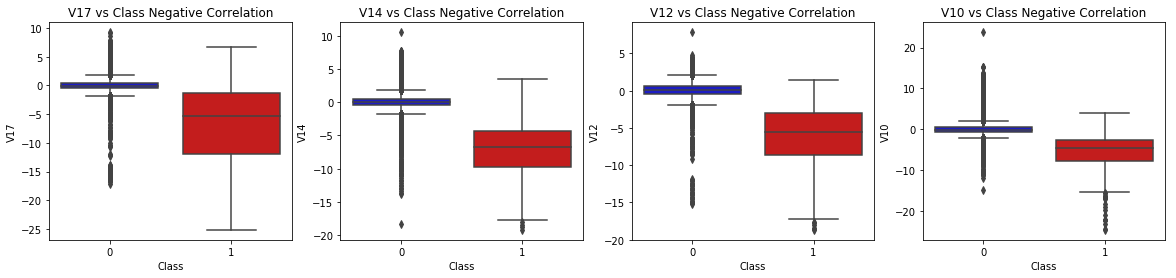

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=CCFD_data, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=CCFD_data, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=CCFD_data, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=CCFD_data, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

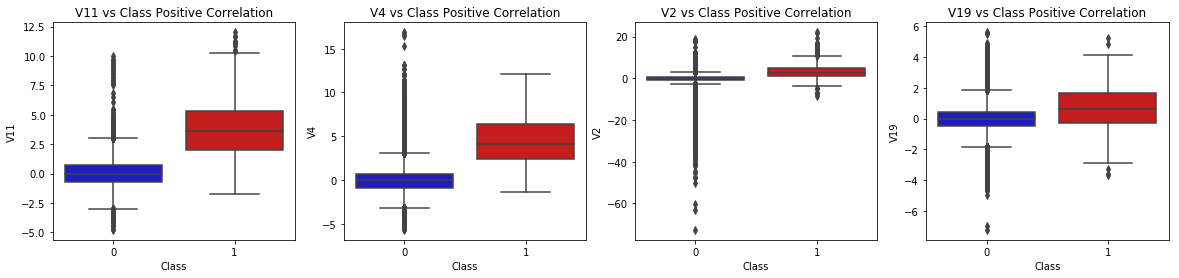

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=CCFD_data, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=CCFD_data, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=CCFD_data, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=CCFD_data, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

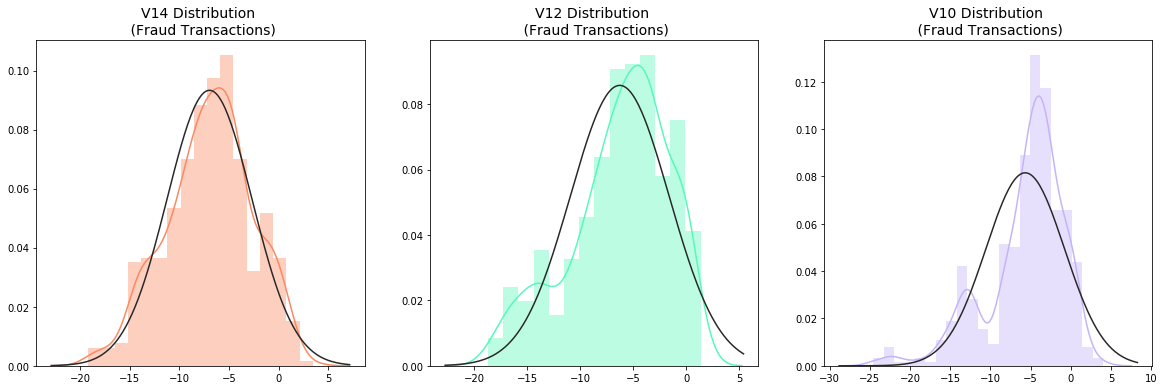

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = CCFD_data['V14'].loc[CCFD_data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = CCFD_data['V12'].loc[CCFD_data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = CCFD_data['V10'].loc[CCFD_data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [22]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = CCFD_data['V14'].loc[CCFD_data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = CCFD_data.drop(CCFD_data[(CCFD_data['V14'] > v14_upper) | (CCFD_data['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = CCFD_data['V12'].loc[CCFD_data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = CCFD_data.drop(new_df[(new_df['V12'] > v12_upper) | (CCFD_data['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = CCFD_data['V10'].loc[CCFD_data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
CCFD_data = CCFD_data.drop(CCFD_data[(CCFD_data['V10'] > v10_upper) | (CCFD_data['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(CCFD_data)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.25930926645337
V12 Upper: 5.597044719256134
V12 outliers: [-17.7691434633638, -17.631606313870698, -18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 6
Number of Instances after outliers removal: 284803
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -15.47046969983434
V10 Upper: 5.0995875

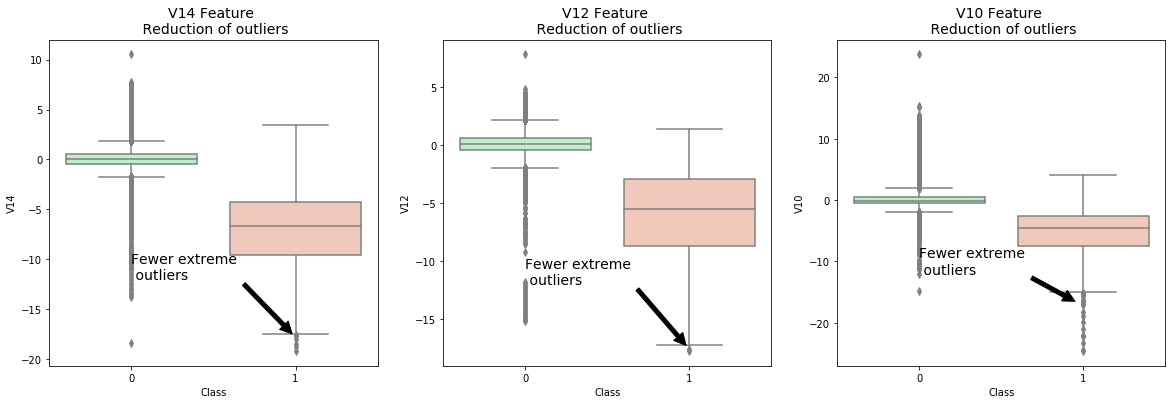

In [23]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [24]:
# Since our Target Variables are highly skewed we should make them equivalent in order to have a normal distribution 
# of the Target Variables.

# Lets shuffle the data before creating the subsamples

df = CCFD_data.sample(frac=1)

# amount of frauds in Class Variable is 492.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
223156,1.890886,-1.034432,-0.504816,-0.343672,-0.929390,-0.192125,-0.686410,-0.056309,-0.269138,0.740488,...,-0.984474,0.322098,-0.393078,-0.531538,-0.675705,0.041459,-0.020492,0,1.170265,0.688154
43061,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,-15.124163,...,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,1,0.169357,-0.509158
234633,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1,-0.285195,0.744381
116139,-1.548788,1.808698,-0.953509,2.213085,-2.015728,-0.913457,-2.356013,1.197169,-1.678374,-3.538650,...,0.774745,0.059037,0.343200,-0.468938,-0.278338,0.625922,0.395573,1,0.767694,-0.123744
238466,1.833191,0.745333,-1.133009,3.893556,0.858164,0.910235,-0.498200,0.344703,-0.667939,0.398155,...,0.181652,0.072981,-0.155299,-0.149891,0.012792,0.040854,0.022903,1,-0.064417,0.763449


Distribution of the Classes in the subsample dataset
0    0.509845
1    0.490155
Name: Class, dtype: float64


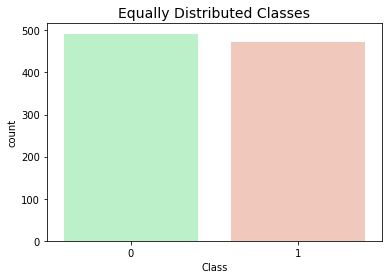

In [25]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

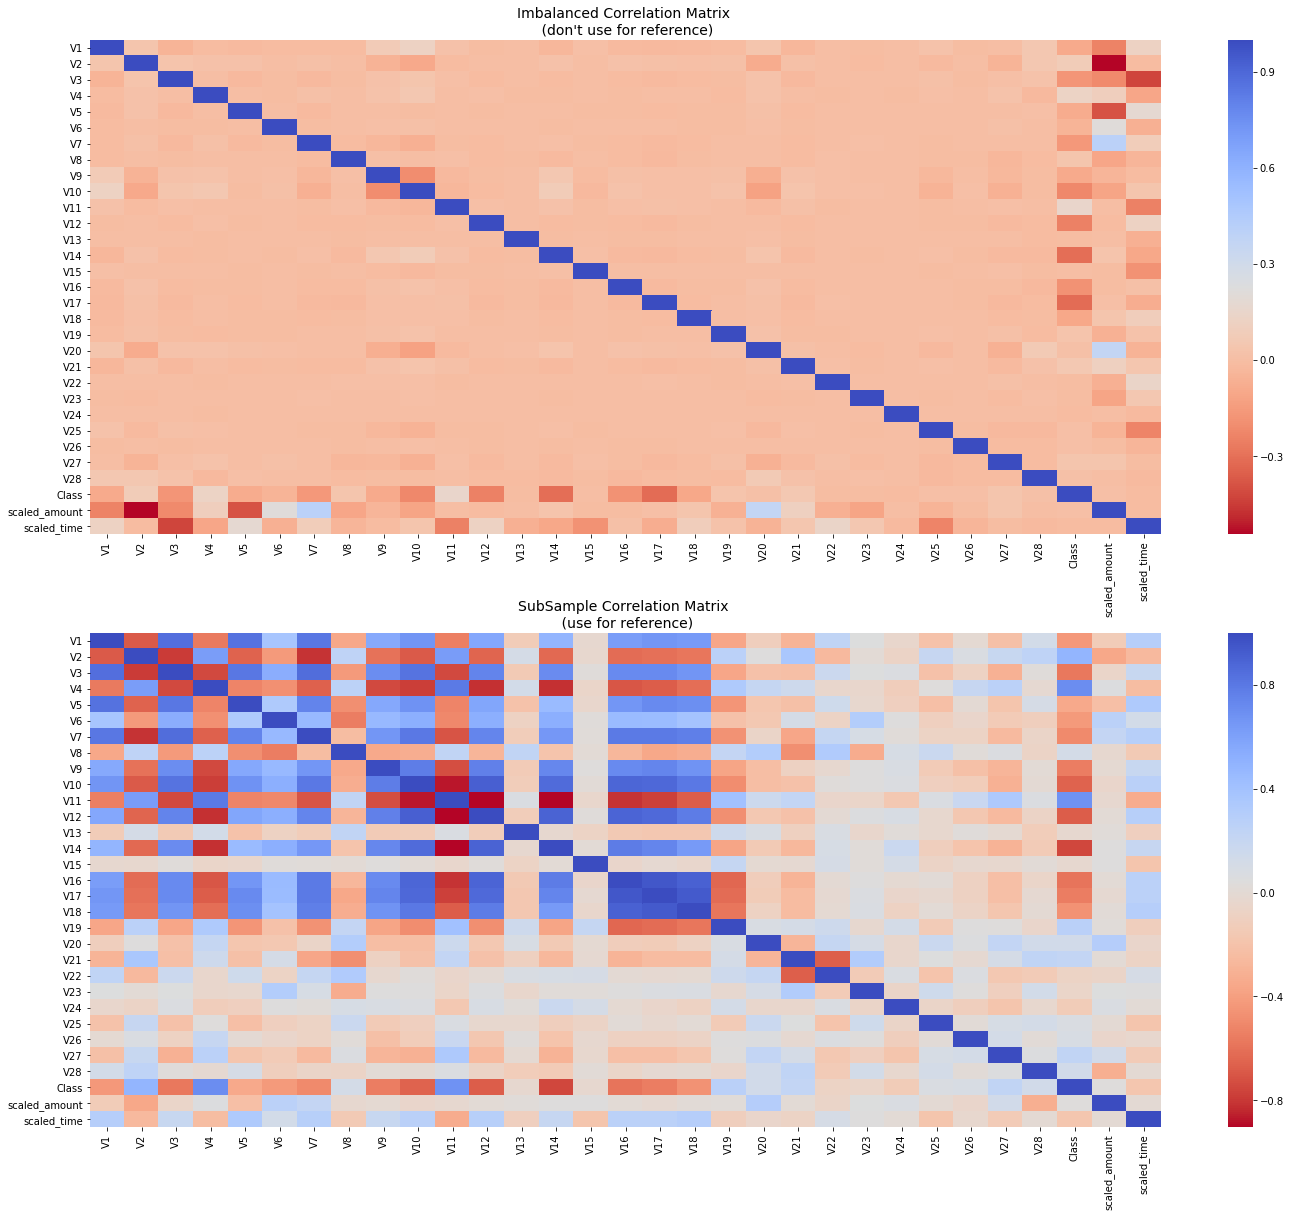

In [26]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [27]:
# CCFD_data is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))


T-SNE took 5.7 s
PCA took 0.074 s


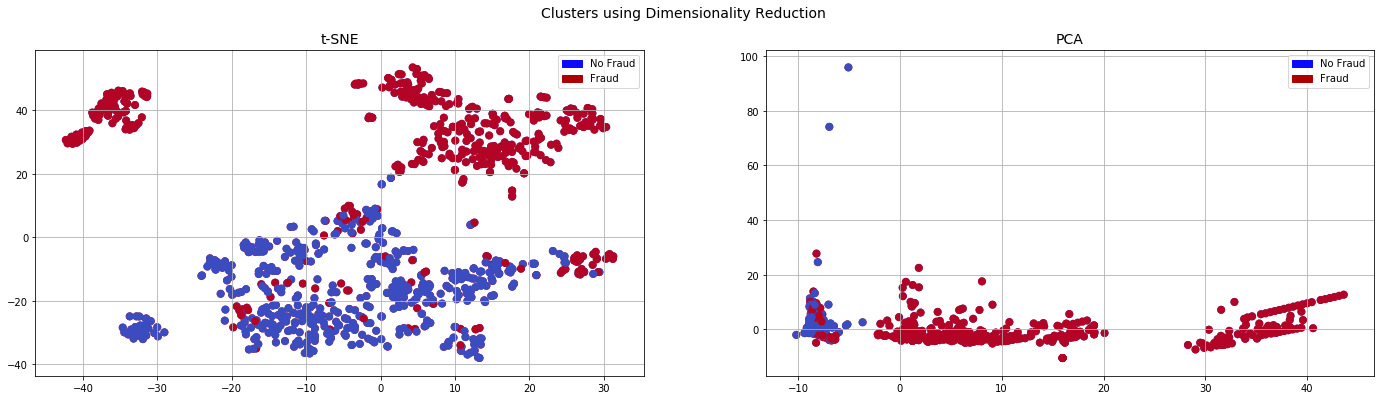

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])


In [29]:
# Splitting the data
train, test = train_test_split(new_df, train_size = 0.7, test_size = 0.3,random_state = 1,shuffle = False)

# Train Data

In [30]:
print('Train')
print ('count of 1: {:.0f}' .format(len(train[train['Class'] == 1])))
print ('count of 0: {:.0f}' .format(len(train[train['Class'] == 0])))

Train
count of 1: 342
count of 0: 333


In [31]:
X_train = train.drop('Class', axis=1)
y_train = train['Class']

# Support Vector Machine

In [32]:
# Run Logistic Regressions only for train data
# Run SVM only for train data
t0 = time.time()
linear_svm = SVC(kernel='linear', C=0.1, gamma=10).fit(X_train, y_train)
t1 = time.time()
print("Linear Model took {:.2} s".format(t1 - t0))
linear_time = t1 - t0

t2 = time.time()
RBF_svm = SVC(kernel='rbf', C=0.1, gamma=10).fit(X_train, y_train)
t3 = time.time()
print("RBF Model took {:.2} s".format(t3 - t2))
RBF_time = t3 - t2

t4 = time.time()
Poly_svm = SVC(kernel='poly', C=0.1,degree=3, gamma=10).fit(X_train,y_train)
t5 = time.time()
print("RBF Model took {:.2} s".format(t5 - t4))
Poly_time = t5 - t4


Linear Model took 0.009 s
RBF Model took 0.058 s
RBF Model took 0.015 s


In [33]:
# Predicted Target Values
linear_pred = linear_svm.predict(X_train)
RBF_pred = RBF_svm.predict(X_train)
Poly_pred = Poly_svm.predict(X_train)

In [34]:
# Confusion Matrix for Linear Model
linear_cm = np.array(confusion_matrix(y_train,linear_pred))
linear_matrix = pd.DataFrame(linear_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
linear_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,328,5
Predicted No Fraud,32,310


In [35]:
# Confusion Matrix for RBF Model
RBF_cm = np.array(confusion_matrix(y_train,RBF_pred))
RBF_matrix = pd.DataFrame(RBF_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
RBF_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,0,333
Predicted No Fraud,0,342


In [36]:
# Confusion Matrix for Polynomial Model
Poly_cm = np.array(confusion_matrix(y_train,Poly_pred))
Poly_matrix = pd.DataFrame(Poly_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
Poly_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,333,0
Predicted No Fraud,0,342


In [37]:
# Accuracy of three SVM Models
print("Linear Model accuracy", accuracy_score(y_train,linear_pred))
print("RBF Model accuracy", accuracy_score(y_train,RBF_pred))
print("Polynomial Model accuracy", accuracy_score(y_train,Poly_pred))

Linear Model accuracy 0.9451851851851852
RBF Model accuracy 0.5066666666666667
Polynomial Model accuracy 1.0


In [38]:
linear_svm_score = cross_val_score(linear_svm, X_train, y_train, cv=5)
print('Linear Model Cross Validation Score', \
      round(linear_svm_score.mean() * 100, 2).astype(str) + '%')

RBF_svm_score = cross_val_score(RBF_svm, X_train, y_train, cv=5)
print('RBF Model Cross Validation Score', \
      round(RBF_svm_score.mean() * 100, 2).astype(str) + '%')

Poly_svm_score = cross_val_score(Poly_svm, X_train, y_train, cv=5)
print('Polynomial Model Cross Validation Score', \
      round(Poly_svm_score.mean() * 100, 2).astype(str) + '%')

Linear Model Cross Validation Score 93.03%
RBF Model Cross Validation Score 50.67%
Polynomial Model Cross Validation Score 91.7%


In [39]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
print('Best SVC paramterers: ',svc)

Best SVC paramterers:  SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


# Decision Tree

In [40]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
t2 = time.time()
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params).fit(X_train, y_train)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))


# tree best estimator
tree_clf = grid_tree.best_estimator_

Decision Tree Model took 0.16 s


In [41]:
# Confusion Matrix for Decision Tree 
Decision_Tree_pred = tree_clf.predict(X_train)
DT_cm = np.array(confusion_matrix(y_train,Decision_Tree_pred))
DT_Conf_matrix = pd.DataFrame(DT_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
DT_Conf_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,326,7
Predicted No Fraud,51,291


In [42]:
print('Decision Tree Accuracy on training set: {:.4f}'.format(accuracy_score(y_train,Decision_Tree_pred)))

Decision Tree Accuracy on training set: 0.9141


In [43]:
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('Decision Tree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Decision Tree Classifier Cross Validation Score 90.07%


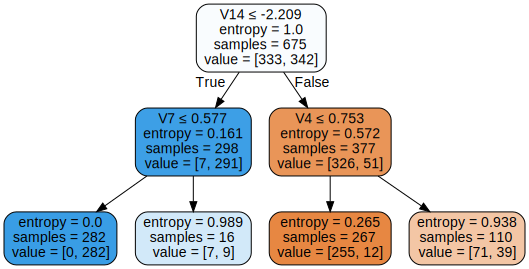

In [44]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                             feature_names=train.columns[:30],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source (dot_data)
graph

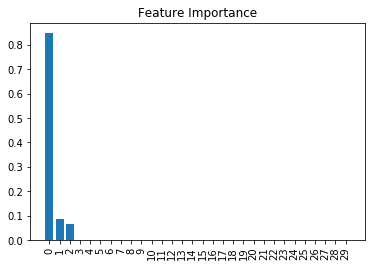

In [45]:
# Feature Importance
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), rotation=90)

# Show plot
plt.show()

# Boosted Decision Tree

In [46]:
# Boosted DecisionTree Classifier
XGboost_tree_params = { "max_depth": list(range(2,4,1)),
              "reg_lambda": list(range(5,7,1))}
t2 = time.time()
XGboost_grid_tree = GridSearchCV(XGBClassifier(), XGboost_tree_params).fit(X_train, y_train)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
XGboost_tree_clf = XGboost_grid_tree.best_estimator_

Decision Tree Model took 1.4 s


In [47]:
# Confusion Matrix for Decision Tree 
XGboost_Decision_Tree_pred = XGboost_tree_clf.predict(X_train)
XGboost_DT_cm = np.array(confusion_matrix(y_train,XGboost_Decision_Tree_pred))
XGboost_DT_Conf_matrix = pd.DataFrame(XGboost_DT_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
XGboost_DT_Conf_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,330,3
Predicted No Fraud,17,325


In [48]:
print('XG Boosted Decision Tree Accuracy on training set: {:.4f}'.format(accuracy_score(y_train,XGboost_Decision_Tree_pred)))

XG Boosted Decision Tree Accuracy on training set: 0.9704


In [49]:
XGboost_DT_score = cross_val_score(XGboost_tree_clf, X_train, y_train, cv=5)
print(' XG Boosted Decision Tree Classifier Cross Validation Score', 
      round(XGboost_DT_score.mean() * 100, 2).astype(str) + '%')

 XG Boosted Decision Tree Classifier Cross Validation Score 92.89%


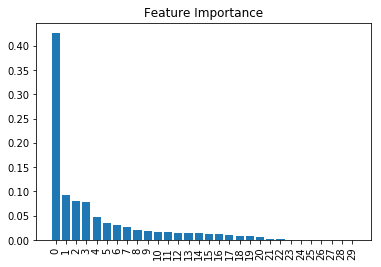

In [50]:
# Feature Importance
importances = XGboost_tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), rotation=90)

# Show plot
plt.show()

# KNN Classifier

In [51]:
# KNN Classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

t2 = time.time()
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params).fit(X_train, y_train)
t3 = time.time()
print("KNN CLassifier Model took {:.2} s".format(t3 - t2))


# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
print('Best features of KNN classifiers are:',knears_neighbors)

KNN CLassifier Model took 0.56 s
Best features of KNN classifiers are: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


In [52]:
# Confusion Matrix for Decision Tree 
Knn_pred = knears_neighbors.predict(X_train)
Knn_cm = np.array(confusion_matrix(y_train,Knn_pred))
Knn_Conf_matrix = pd.DataFrame(Knn_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
Knn_Conf_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,327,6
Predicted No Fraud,22,320


In [53]:
print('KNN Classifier Accuracy on training set:', round(accuracy_score(y_train,Knn_pred) * 100, 2).astype(str) + '%')

KNN Classifier Accuracy on training set: 95.85%


In [54]:
knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 92.29%


# Neural Networks

In [55]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}

In [56]:
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        Name = 'FCV Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_size,int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs/{}'.format(Name))
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X.shape[1],input_shape=(X.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="relu"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="relu"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'FCV Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs/{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_train,y_train,batch_size=128,epochs=20,validation_split = 0.3,callbacks=[tensorboard])

Instructions for updating:
Colocations handled automatically by placer.
Train on 472 samples, validate on 203 samples
Epoch 1/20
472/472 [==============================] - 0s 333us/sample - loss: 1.0548 - acc: 0.4322 - val_loss: 0.8155 - val_acc: 0.4187
Epoch 2/20
472/472 [==============================] - 0s 21us/sample - loss: 0.7951 - acc: 0.4767 - val_loss: 0.6917 - val_acc: 0.6256
Epoch 3/20
472/472 [==============================] - 0s 21us/sample - loss: 0.6542 - acc: 0.6992 - val_loss: 0.6274 - val_acc: 0.7537
Epoch 4/20
472/472 [==============================] - 0s 21us/sample - loss: 0.5852 - acc: 0.8114 - val_loss: 0.5803 - val_acc: 0.7833
Epoch 5/20
472/472 [==============================] - 0s 21us/sample - loss: 0.5371 - acc: 0.8326 - val_loss: 0.5404 - val_acc: 0.8177
Epoch 6/20
472/472 [==============================] - 0s 21us/sample - loss: 0.4957 - acc: 0.8432 - val_loss: 0.5060 - val_acc: 0.8177
Epoch 7/20
472/472 [==============================] - 0s 23us/sample - 

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 30)                930       
_________________________________________________________________
Dense_layer-1 (Dense)        (None, 64)                1984      
_________________________________________________________________
Dense_layer-2 (Dense)        (None, 32)                2080      
_________________________________________________________________
Dense_layer-3 (Dense)        (None, 16)                528       
_________________________________________________________________
Output_layer (Dense)         (None, 2)                 34        
Total params: 5,556
Trainable params: 5,556
Non-trainable params: 0
_________________________________________________________________


In [58]:
print('Neural Networks Accuracy on training set:', round(model.evaluate(X_train,y_train, 
                                                                    batch_size=128)[1] * 100, 2).astype(str) + '%')

675/675 [==============================] - 0s 9us/sample - loss: 0.1684 - acc: 0.9333
Neural Networks Accuracy on training set: 93.33%


In [59]:
NN_pred = model.predict_classes(X_train)

In [60]:
# Confusion Matrix for Decision Tree 
NN_pred = model.predict_classes(X_train,batch_size=200, verbose=0)
NN_cm = confusion_matrix(y_train,NN_pred)
NN_Conf_matrix = pd.DataFrame(NN_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
NN_Conf_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,323,10
Predicted No Fraud,35,307


# Test Data

In [61]:
print('Test')
print ('count of 1: {:.0f}' .format(len(test[test['Class'] == 1])))
print ('count of 0: {:.0f}' .format(len(test[test['Class'] == 0])))

Test
count of 1: 131
count of 0: 159


In [62]:
X_test = test.drop('Class', axis=1)
y_test = test['Class']

# Support Vector Machine

In [63]:
# Run Logistic Regressions only for train data
# Run Logistic Regressions only for train data
# Run SVM only for train data
t0 = time.time()
linear_svm_test = SVC(kernel='linear', C=0.1, gamma=10).fit(X_test, y_test)
t1 = time.time()
print("Linear Model took {:.2} s".format(t1 - t0))
linear_time = t1 - t0

t2 = time.time()
RBF_svm_test = SVC(kernel='rbf', C=0.1, gamma=10).fit(X_test, y_test)
t3 = time.time()
print("RBF Model took {:.2} s".format(t3 - t2))
RBF_time = t3 - t2

t4 = time.time()
Poly_svm_test = SVC(kernel='poly', C=0.1,degree=3, gamma=10).fit(X_test,y_test)
t5 = time.time()
print("RBF Model took {:.2} s".format(t5 - t4))
Poly_time = t5 - t4

Linear Model took 0.003 s
RBF Model took 0.009 s
RBF Model took 0.003 s


In [64]:
# Predicted Target Values
linear_pred_test = linear_svm_test.predict(X_test)
RBF_pred_test = RBF_svm_test.predict(X_test)
Poly_pred_test = Poly_svm_test.predict(X_test)

In [65]:
# Confusion Matrix for Linear Model
linear_cm_test = np.array(confusion_matrix(y_test,linear_pred_test))
linear_matrix_test = pd.DataFrame(linear_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
linear_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,156,3
Predicted No Fraud,13,118


In [66]:
# Confusion Matrix for RBF Model
RBF_cm_test = np.array(confusion_matrix(y_test,RBF_pred_test))
RBF_matrix_test = pd.DataFrame(RBF_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
RBF_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,159,0
Predicted No Fraud,131,0


In [67]:
# Confusion Matrix for Polynomial Model
Poly_cm_test = np.array(confusion_matrix(y_test,Poly_pred_test))
Poly_matrix_test = pd.DataFrame(Poly_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
Poly_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,159,0
Predicted No Fraud,0,131


In [68]:
# Accuracy of three SVM Models
print("Linear Model accuracy", accuracy_score(y_test,linear_pred_test))
print("RBF Model accuracy", accuracy_score(y_test,RBF_pred_test))
print("Polynomial Model accuracy", accuracy_score(y_test,Poly_pred_test))

Linear Model accuracy 0.9448275862068966
RBF Model accuracy 0.5482758620689655
Polynomial Model accuracy 1.0


In [69]:
svc_params_test = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc_test = GridSearchCV(SVC(), svc_params_test)
grid_svc_test.fit(X_test, y_test)

# SVC best estimator
svc_test = grid_svc.best_estimator_

# Decision Tree

In [70]:
# DecisionTree Classifier
tree_params_test = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
t2 = time.time()
grid_tree_test = GridSearchCV(DecisionTreeClassifier(), tree_params_test).fit(X_test, y_test)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
tree_clf_test = grid_tree_test.best_estimator_

Decision Tree Model took 0.091 s


In [71]:
# Confusion Matrix for Decision Tree 
Decision_Tree_pred_test = tree_clf_test.predict(X_test)
DT_cm_test = np.array(confusion_matrix(y_test,Decision_Tree_pred_test))
DT_Conf_matrix_test = pd.DataFrame(DT_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
DT_Conf_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,156,3
Predicted No Fraud,14,117


In [72]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y_test,Decision_Tree_pred_test)))

Decision Tree Accuracy on training set: 0.9414


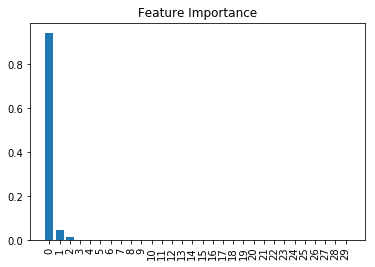

In [73]:
# Feature Importance
importances = tree_clf_test.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), rotation=90)

# Show plot
plt.show()

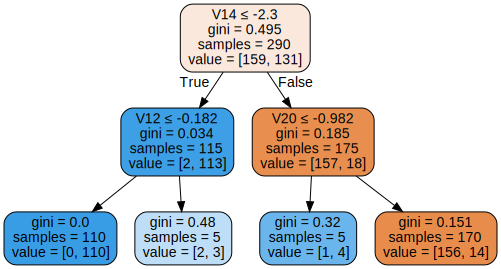

In [74]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(tree_clf_test, out_file=None, 
                             feature_names=train.columns[:30],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source (dot_data)
graph

# Boosted Decision Tree

In [75]:
# Boosted DecisionTree Classifier
XGboost_tree_params_test = { "max_depth": list(range(2,4,1)),
              "reg_lambda": list(range(5,7,1))}
t2 = time.time()
XGboost_grid_tree_test = GridSearchCV(XGBClassifier(), XGboost_tree_params_test).fit(X_test, y_test)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
XGboost_tree_clf_test = XGboost_grid_tree_test.best_estimator_

Decision Tree Model took 0.72 s


In [76]:
# Confusion Matrix for Decision Tree 
XGboost_Decision_Tree_pred_test = XGboost_tree_clf_test.predict(X_test)
XGboost_DT_cm_test = np.array(confusion_matrix(y_test,XGboost_Decision_Tree_pred_test))
XGboost_DT_Conf_matrix_test = pd.DataFrame(XGboost_DT_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
XGboost_DT_Conf_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,159,0
Predicted No Fraud,2,129


In [77]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y_test,XGboost_Decision_Tree_pred_test)))

Decision Tree Accuracy on training set: 0.9931


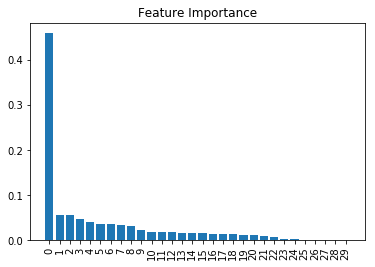

In [78]:
# Feature Importance
importances = XGboost_tree_clf_test.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), rotation=90)

# Show plot
plt.show()

# KNN Classifier

In [79]:
# DecisionTree Classifier
knears_params_test = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

t2 = time.time()
grid_knears_test = GridSearchCV(KNeighborsClassifier(), knears_params_test).fit(X_test, y_test)
t3 = time.time()
print("KNN CLassifier Model took {:.2} s".format(t3 - t2))


# KNears best estimator
knears_neighbors_test = grid_knears_test.best_estimator_
print('Best features of KNN classifiers are:',knears_neighbors_test)

KNN CLassifier Model took 0.19 s
Best features of KNN classifiers are: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')


In [80]:
# Confusion Matrix for Decision Tree 
Knn_pred_test = knears_neighbors.predict(X_test)
Knn_cm_test = np.array(confusion_matrix(y_test,Knn_pred_test))
Knn_Conf_matrix_test = pd.DataFrame(Knn_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
Knn_Conf_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,151,8
Predicted No Fraud,15,116


In [81]:
print('KNN Classifier Accuracy on test set:', round(accuracy_score(y_test,Knn_pred_test) * 100, 2).astype(str) + '%')

KNN Classifier Accuracy on test set: 92.07%


# Neural Networks

In [82]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}

In [83]:
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        Name = 'FCV Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_size,int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs/{}'.format(Name))
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X.shape[1],input_shape=(X.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="relu"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="relu"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'FCV Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs/{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_test,y_test,batch_size=128,epochs=20,validation_split = 0.3,callbacks=[tensorboard])

Train on 203 samples, validate on 87 samples
Epoch 1/20
203/203 [==============================] - 0s 1ms/sample - loss: 0.7940 - acc: 0.3202 - val_loss: 0.7188 - val_acc: 0.5287
Epoch 2/20
203/203 [==============================] - 0s 44us/sample - loss: 0.6669 - acc: 0.4680 - val_loss: 0.6052 - val_acc: 0.6667
Epoch 3/20
203/203 [==============================] - 0s 44us/sample - loss: 0.5977 - acc: 0.4926 - val_loss: 0.5407 - val_acc: 0.6782
Epoch 4/20
203/203 [==============================] - 0s 45us/sample - loss: 0.5616 - acc: 0.5222 - val_loss: 0.5028 - val_acc: 0.7241
Epoch 5/20
203/203 [==============================] - 0s 44us/sample - loss: 0.5399 - acc: 0.5369 - val_loss: 0.4772 - val_acc: 0.7356
Epoch 6/20
203/203 [==============================] - 0s 580us/sample - loss: 0.5231 - acc: 0.5616 - val_loss: 0.4576 - val_acc: 0.7471
Epoch 7/20
203/203 [==============================] - 0s 51us/sample - loss: 0.5089 - acc: 0.5813 - val_loss: 0.4408 - val_acc: 0.7701
Epoch 8/20

In [84]:
print('Neural Networks Accuracy on training set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

290/290 [==============================] - 0s 17us/sample - loss: 0.2286 - acc: 0.9448
Neural Networks Accuracy on training set: 94.48%


In [85]:
NN_pred_test = model.predict_classes(X_test)

In [86]:
# Confusion Matrix for Decision Tree 
NN_pred_test = model.predict_classes(X_test,batch_size=200, verbose=0)
NN_cm_test = confusion_matrix(y_test,NN_pred_test)
NN_Conf_matrix_test = pd.DataFrame(NN_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
NN_Conf_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,158,1
Predicted No Fraud,15,116


# Learning Curves

# Train Data

[Text(0, 0.5, ''), Text(0, 1.5, '')]

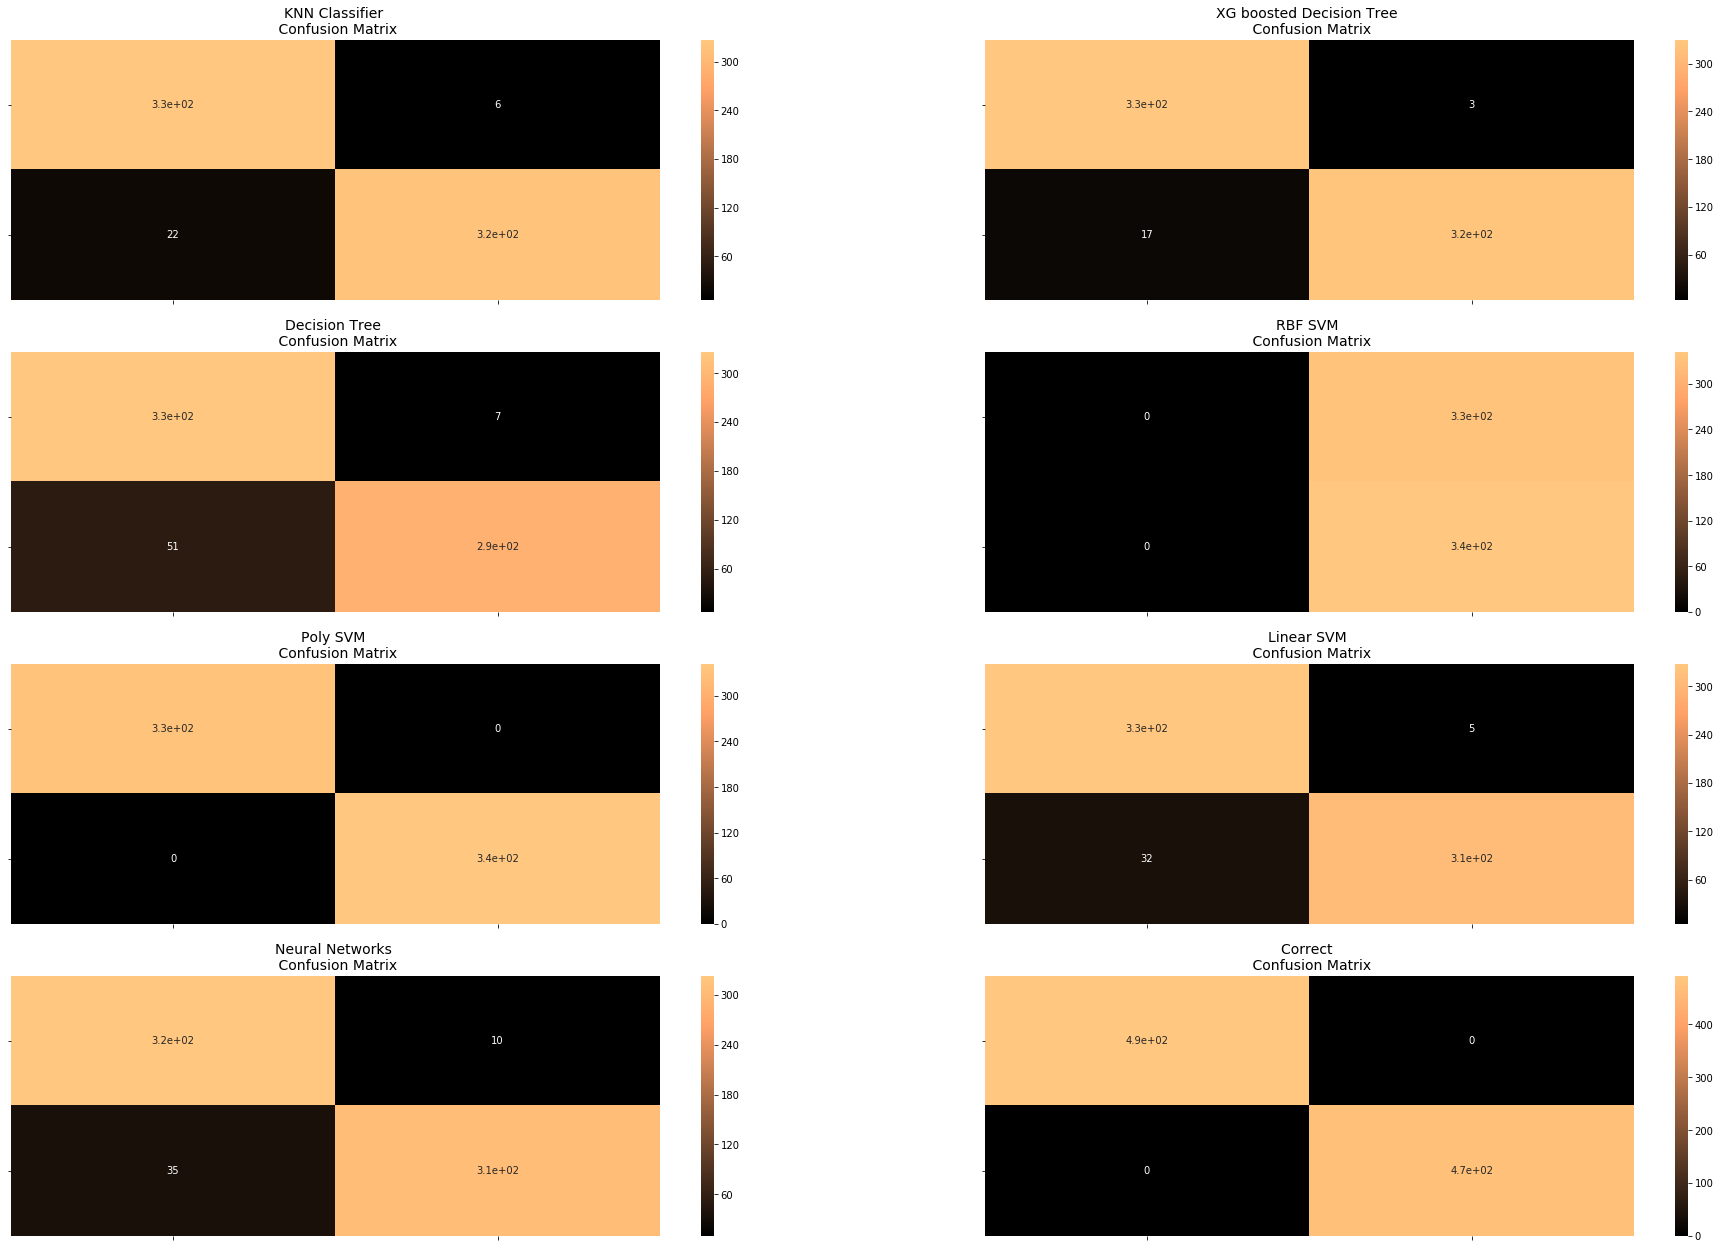

In [87]:
fig, ax = plt.subplots(4, 2,figsize=(32,22))


sns.heatmap(Knn_Conf_matrix, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("KNN Classifier \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(XGboost_DT_Conf_matrix, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0, 1].set_title("XG boosted Decision Tree \n Confusion Matrix", fontsize=14)
ax[0, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(DT_Conf_matrix, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1, 0].set_title("Decision Tree \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(RBF_matrix, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1, 1].set_title("RBF SVM \n Confusion Matrix", fontsize=14)
ax[1, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(Poly_matrix, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2, 0].set_title("Poly SVM \n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(linear_matrix, ax=ax[2][1], annot=True, cmap=plt.cm.copper)
ax[2, 1].set_title("Linear SVM \n Confusion Matrix", fontsize=14)
ax[2, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(NN_Conf_matrix, ax=ax[3][0], annot=True, cmap=plt.cm.copper)
ax[3, 0].set_title("Neural Networks \n Confusion Matrix", fontsize=14)
ax[3, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[3, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(confusion_matrix(y,y), ax=ax[3][1], annot=True, cmap=plt.cm.copper)
ax[3, 1].set_title("Correct \n Confusion Matrix", fontsize=14)
ax[3, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[3, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [88]:
# Overfitting Case

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

XGboost_tree_score = cross_val_score(XGboost_tree_clf, X_train, y_train, cv=5)
print('XGboost_tree_score DecisionTree Classifier Cross Validation Score', \
      round(XGboost_tree_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 92.89%
DecisionTree Classifier Cross Validation Score 90.07%
XGboost_tree_score DecisionTree Classifier Cross Validation Score 92.89%
Knears Neighbors Cross Validation Score 92.29%


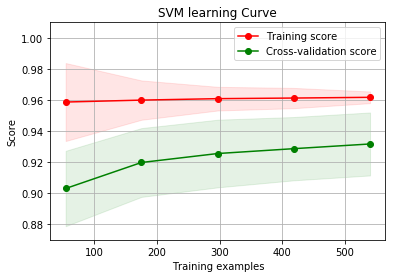

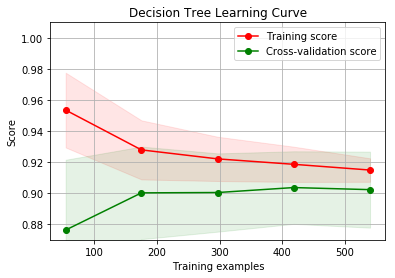

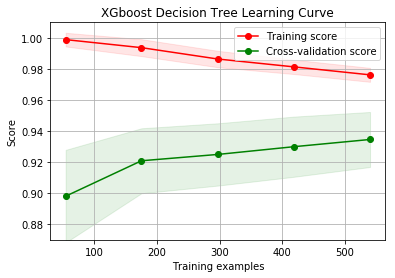

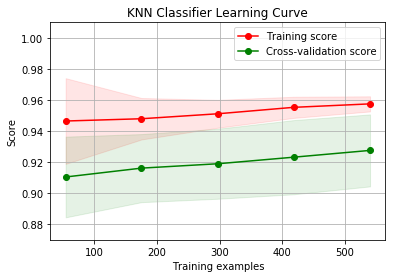

In [89]:
# Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(svc, 'SVM learning Curve', X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(tree_clf,'Decision Tree Learning Curve', X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(XGboost_tree_clf,'XGboost Decision Tree Learning Curve', X_train, y_train, (0.87, 1.01),
                    cv=cv, n_jobs=4)
plot_learning_curve(knears_neighbors,'KNN Classifier Learning Curve', X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

plt.show()

In [90]:
# Create a DataFrame with all the scores and the classifiers names.

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

XGboost_tree_pred = cross_val_predict(XGboost_tree_clf, X_train, y_train, cv=5)

Knn_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

In [91]:
print('Support Vector Classifier: ', round(roc_auc_score(y_train, svc_pred) * 100, 2).astype(str) + '%')
print('Decision Tree Classifier: ', round(roc_auc_score(y_train, tree_pred)* 100, 2).astype(str) + '%')
print('XGboost Decision Tree Classifier: ', round(roc_auc_score(y_train, XGboost_tree_pred)* 100, 2).astype(str) + '%')
print('KNN Classifier: ', round(roc_auc_score(y_train, Knn_pred)* 100, 2).astype(str) + '%')
print('Neural Network Classifier: ', round(roc_auc_score(y_train, NN_pred)* 100, 2).astype(str) + '%')

Support Vector Classifier:  97.36%
Decision Tree Classifier:  90.17%
XGboost Decision Tree Classifier:  92.92%
KNN Classifier:  92.33%
Neural Network Classifier:  93.38%


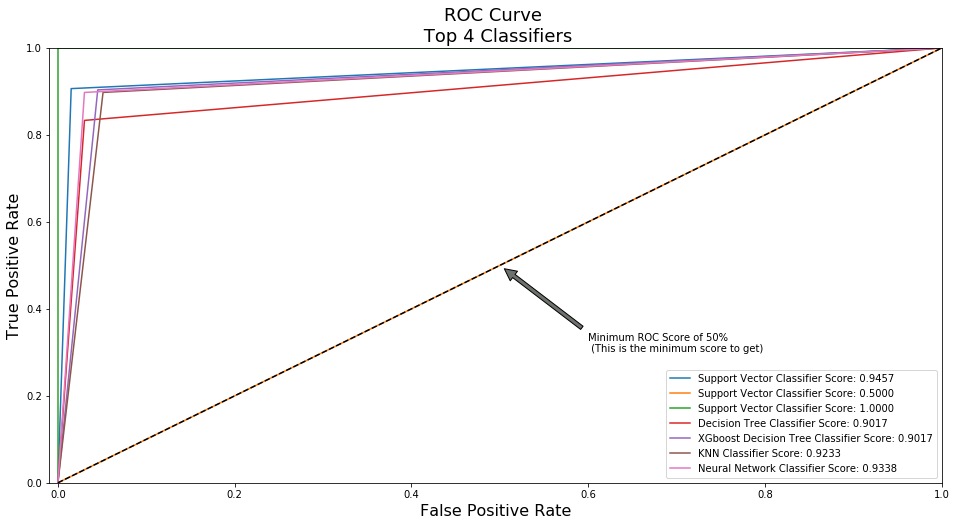

In [92]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_train, XGboost_tree_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
Knn_fpr, Knn_tpr, Knn_threshold = roc_curve(y_train, Knn_pred)
l_svc_fpr, l_svc_tpr, l_svc_threshold = roc_curve(y_train, linear_pred)
r_svc_fpr, r_svc_tpr, r_svc_threshold = roc_curve(y_train, RBF_pred)
p_svc_fpr, p_svc_tpr, p_svc_threshold = roc_curve(y_train, Poly_pred)
NN_fpr, NN_tpr, NN_threshold = roc_curve(y_train, NN_pred)
    
graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr, l_svc_fpr, l_svc_tpr,r_svc_fpr, r_svc_tpr,
                           p_svc_fpr, p_svc_tpr, tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr)
plt.show()

# Test Data

[Text(0, 0.5, ''), Text(0, 1.5, '')]

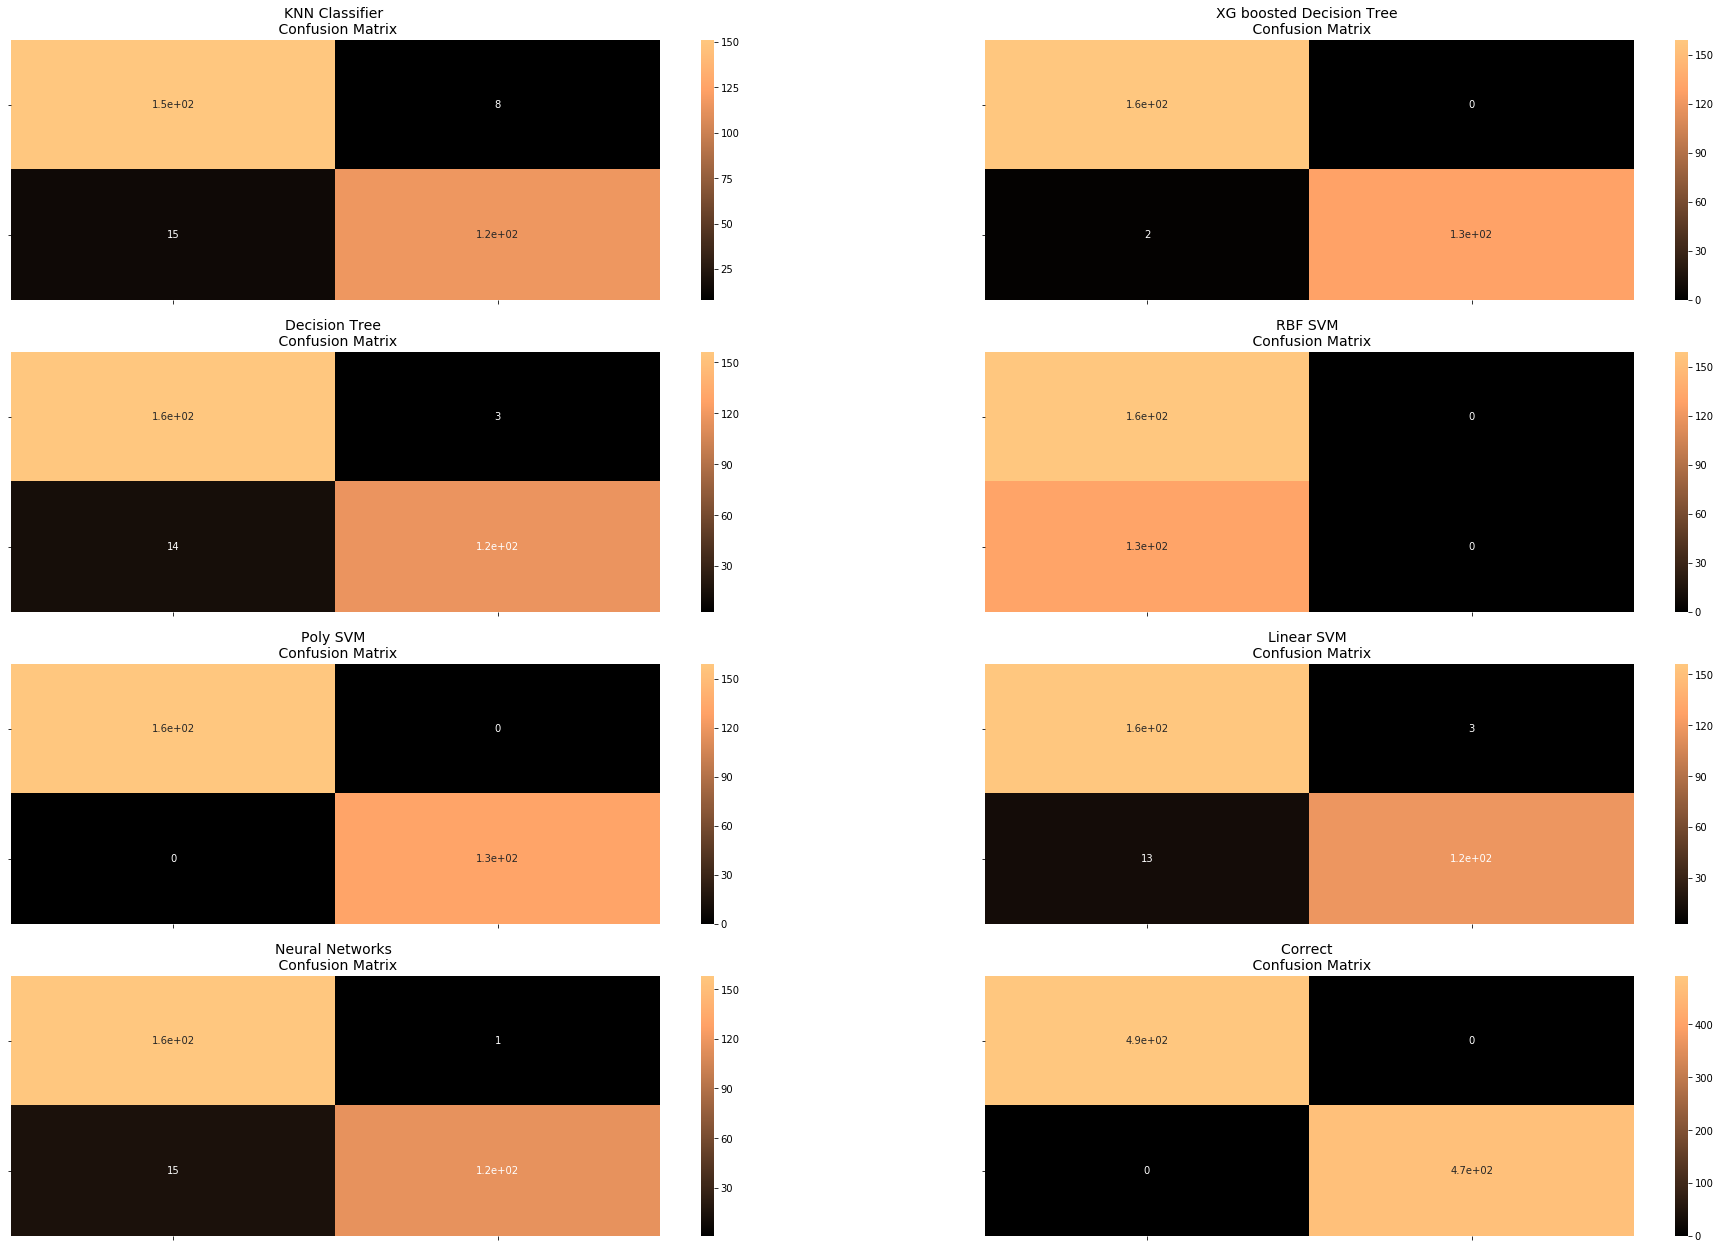

In [93]:
fig, ax = plt.subplots(4, 2,figsize=(32,22))


sns.heatmap(Knn_Conf_matrix_test, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("KNN Classifier \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(XGboost_DT_Conf_matrix_test, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0, 1].set_title("XG boosted Decision Tree \n Confusion Matrix", fontsize=14)
ax[0, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(DT_Conf_matrix_test, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1, 0].set_title("Decision Tree \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(RBF_matrix_test, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1, 1].set_title("RBF SVM \n Confusion Matrix", fontsize=14)
ax[1, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(Poly_matrix_test, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2, 0].set_title("Poly SVM \n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(linear_matrix_test, ax=ax[2][1], annot=True, cmap=plt.cm.copper)
ax[2, 1].set_title("Linear SVM \n Confusion Matrix", fontsize=14)
ax[2, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(NN_Conf_matrix_test, ax=ax[3][0], annot=True, cmap=plt.cm.copper)
ax[3, 0].set_title("Neural Networks \n Confusion Matrix", fontsize=14)
ax[3, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[3, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(confusion_matrix(y,y), ax=ax[3][1], annot=True, cmap=plt.cm.copper)
ax[3, 1].set_title("Correct \n Confusion Matrix", fontsize=14)
ax[3, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[3, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [94]:
print('Linear Support Vector Classifier: ', round(roc_auc_score(y_test, linear_pred_test)* 100, 2).astype(str) + '%')
print('RBF Support Vector Classifier: ', round(roc_auc_score(y_test, RBF_pred_test)* 100, 2).astype(str) + '%')
print('POLY Support Vector Classifier: ', round(roc_auc_score(y_test, Poly_pred_test)* 100, 2).astype(str) + '%')
print('Decision Tree Classifier: ', round(roc_auc_score(y_test, Decision_Tree_pred_test)* 100, 2).astype(str) + '%')
print('XGboost Decision Tree Classifier: ', round(roc_auc_score(y_test, XGboost_Decision_Tree_pred_test)* 100, 2).astype(str) + '%')
print('KNN Classifier Classifier: ',round(roc_auc_score(y_test, Knn_pred_test)* 100, 2).astype(str) + '%')
print('Neural Network Classifier: ', round(roc_auc_score(y_test, NN_pred_test)* 100, 2).astype(str) + '%')

Linear Support Vector Classifier:  94.09%
RBF Support Vector Classifier:  50.0%
POLY Support Vector Classifier:  100.0%
Decision Tree Classifier:  93.71%
XGboost Decision Tree Classifier:  99.24%
KNN Classifier Classifier:  91.76%
Neural Network Classifier:  93.96%


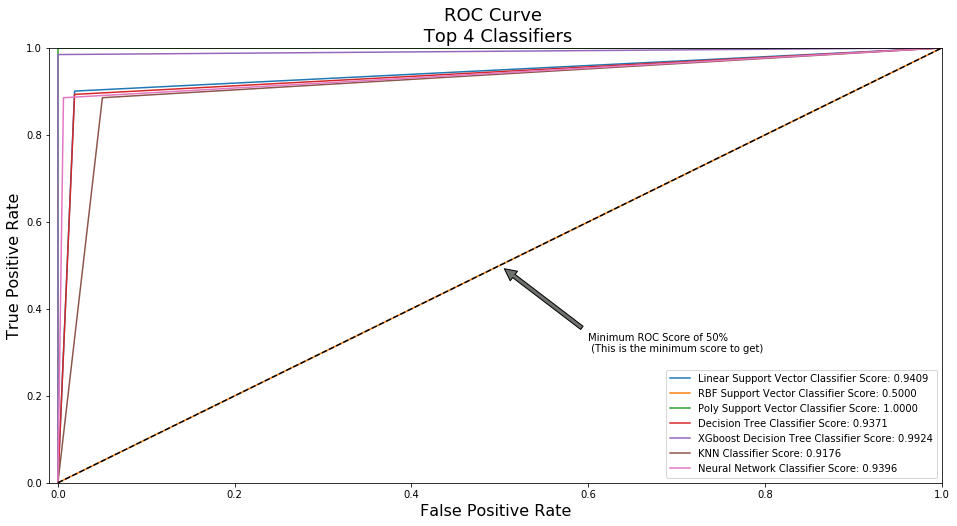

In [95]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_test, XGboost_Decision_Tree_pred_test)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, Decision_Tree_pred_test)
Knn_fpr, Knn_tpr, Knn_threshold = roc_curve(y_test, Knn_pred_test)
l_svc_fpr, l_svc_tpr, l_svc_threshold = roc_curve(y_test, linear_pred_test)
r_svc_fpr, r_svc_tpr, r_svc_threshold = roc_curve(y_test, RBF_pred_test)
p_svc_fpr, p_svc_tpr, p_svc_threshold = roc_curve(y_test, Poly_pred_test)
NN_fpr, NN_tpr, NN_threshold = roc_curve(y_test, NN_pred_test)

graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, l_svc_fpr, l_svc_tpr,r_svc_fpr, r_svc_tpr,
                           p_svc_fpr, p_svc_tpr, tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr)
plt.show()

# Test and Train Error Learning Curves

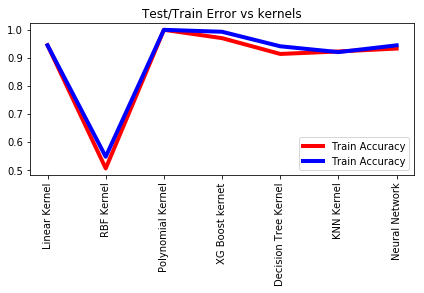

In [96]:
# Kernel Learning Curve
k = ["Linear Kernel","RBF Kernel","Polynomial Kernel","XG Boost kernet","Decision Tree Kernel",
     "KNN Kernel","Neural Network"]
Train_error = [accuracy_score(y_train,linear_pred),accuracy_score(y_train,RBF_pred),
               accuracy_score(y_train,Poly_pred),accuracy_score(y_train, XGboost_Decision_Tree_pred),
               accuracy_score(y_train, Decision_Tree_pred),accuracy_score(y_train, Knn_pred),
               accuracy_score(y_train, NN_pred)]

Test_error = [accuracy_score(y_test,linear_pred_test),accuracy_score(y_test,RBF_pred_test),
               accuracy_score(y_test,Poly_pred_test),accuracy_score(y_test, XGboost_Decision_Tree_pred_test),
               accuracy_score(y_test, Decision_Tree_pred_test),accuracy_score(y_test, Knn_pred_test),
               accuracy_score(y_test, NN_pred_test)]

plt.plot(k,Train_error,marker = '',color='red',linewidth=4,label='Train Accuracy')
plt.plot(k,Test_error,marker = '',color='blue',linewidth=4,label='Train Accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Test/Train Error vs kernels")
plt.legend()